## Regression Coefficients are affected by regularisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Read Data

In [2]:
data = pd.read_csv('../Kyoto_Train.csv')
data.shape

(124055, 24)

In [3]:
data.head()

,Duration,Source,Destination_bytes,Count,Same_srv_rate,Serror_rate,Srv_serror_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_port_rate,...,Service_code,Flag_code,IDS_detection_code,Malware_detection_code,Ashula_detection_code,Source_IP_Address_code,Destination_IP_Address_code,Start_Time_code,Protocol_code,Label_code
0,2.863309,0,0,0,0.0,0.0,1.00,0,0,0.00,...,6.0,6.0,0.0,0.0,0.0,90847.0,14024.0,25836.0,1.0,0.0
1,0.000000,0,0,0,0.0,0.0,1.00,0,0,0.00,...,6.0,6.0,0.0,0.0,0.0,218531.0,8968.0,45541.0,1.0,0.0
2,0.000000,0,0,0,0.0,0.0,1.00,0,0,0.00,...,6.0,6.0,0.0,0.0,0.0,176665.0,15997.0,59860.0,1.0,0.0
3,0.000000,0,0,0,0.0,0.0,0.67,49,100,0.02,...,6.0,6.0,0.0,0.0,0.0,52769.0,473.0,40649.0,1.0,0.0
4,0.000000,0,0,1,1.0,0.0,0.36,0,2,0.00,...,6.0,0.0,0.0,0.0,0.0,65048.0,16609.0,39283.0,1.0,0.0


### Train - Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Label_code'], axis=1),
    data['Label_code'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((99244, 23), (24811, 23))

Fitting a few logistic regression models with decreasing values for the penalty of the regularisation

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

coefs_df = []

# we train 4 different models with regularization
penalties = [0.00005, 0.0005, 0.005, 0.05, 0.5]

for c in penalties:   
    
    logit = LogisticRegression(C=c, penalty='l2', random_state=10, max_iter=300)
    logit.fit(scaler.transform(X_train), y_train)
    
    # store the coefficients of the variables in a list
    coefs_df.append(pd.Series(logit.coef_.ravel()))

In [6]:
# Create a dataframe with the coefficients for all
# the variables for the 4 different logistic regression models

coefs = pd.concat(coefs_df, axis=1)
coefs.columns = penalties
coefs.index = X_train.columns
coefs.head(15)

,0.00005,0.00050,0.00500,0.05000,0.50000
Duration,0.015612,0.086586,0.154846,0.200535,0.211751
Source,0.001223,-0.007469,-0.077617,-0.170878,-0.201239
Destination_bytes,-0.002193,-0.011778,-0.069653,-0.171629,-0.156074
Count,0.004374,-0.044636,-0.077832,-0.089285,-0.089714
Same_srv_rate,0.147267,0.422572,0.579489,0.590402,0.589230
Serror_rate,0.018678,0.011807,-0.037470,-0.049182,-0.050056
Srv_serror_rate,-0.109619,-0.203906,-0.032637,0.086795,0.109268
Dst_host_count,-0.114366,-0.792885,-1.584127,-1.828018,-1.859408
Dst_host_srv_count,0.049944,0.176096,0.656548,0.872480,0.901563
Dst_host_same_port_rate,0.012782,0.091362,0.171991,0.194693,0.197455


In [7]:
# apply log scale to the penalties (simplifies comparison)

coefs.columns = np.log(penalties)
coefs.head(15)

,-9.903488,-7.600902,-5.298317,-2.995732,-0.693147
Duration,0.015612,0.086586,0.154846,0.200535,0.211751
Source,0.001223,-0.007469,-0.077617,-0.170878,-0.201239
Destination_bytes,-0.002193,-0.011778,-0.069653,-0.171629,-0.156074
Count,0.004374,-0.044636,-0.077832,-0.089285,-0.089714
Same_srv_rate,0.147267,0.422572,0.579489,0.590402,0.589230
Serror_rate,0.018678,0.011807,-0.037470,-0.049182,-0.050056
Srv_serror_rate,-0.109619,-0.203906,-0.032637,0.086795,0.109268
Dst_host_count,-0.114366,-0.792885,-1.584127,-1.828018,-1.859408
Dst_host_srv_count,0.049944,0.176096,0.656548,0.872480,0.901563
Dst_host_same_port_rate,0.012782,0.091362,0.171991,0.194693,0.197455


Text(0.5, 1.0, 'Coefficient value vs penalty. Each line corresponds to one variable')

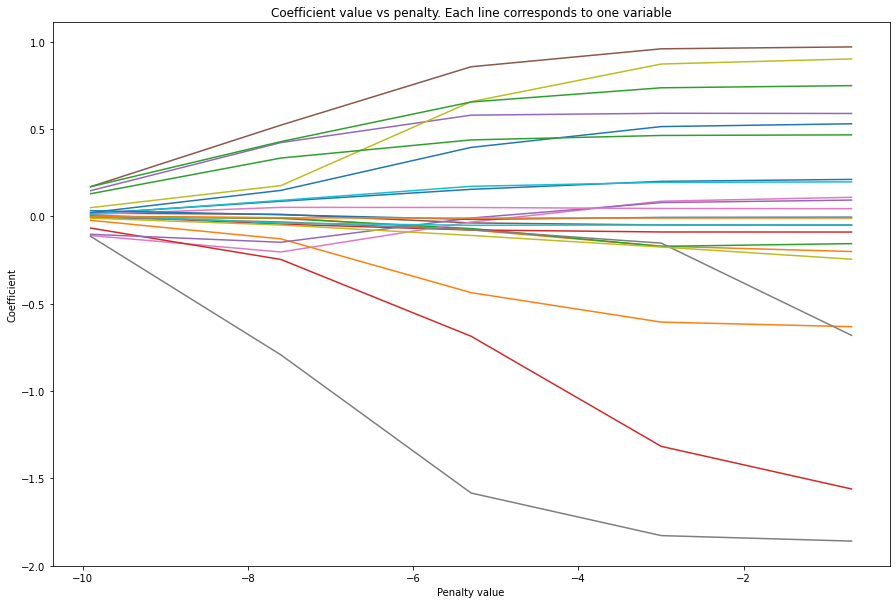

In [8]:
# plot the change in coefficients with the penalty
coefs.T.plot(figsize=(15,10), legend=False)
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty. Each line corresponds to one variable')

Text(0.5, 1.0, 'Coefficient value vs penalty')

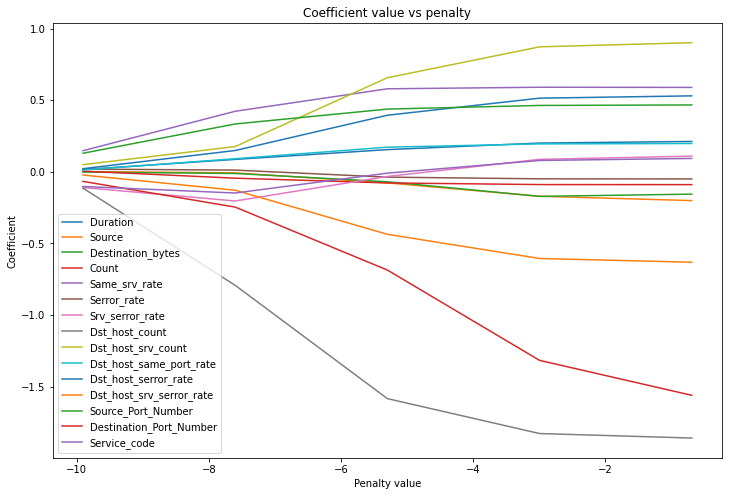

In [9]:
# now I will plot only the first 10 features for better visualisation

temp = coefs.head(15)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

Text(0.5, 1.0, 'Coefficient value vs penalty')

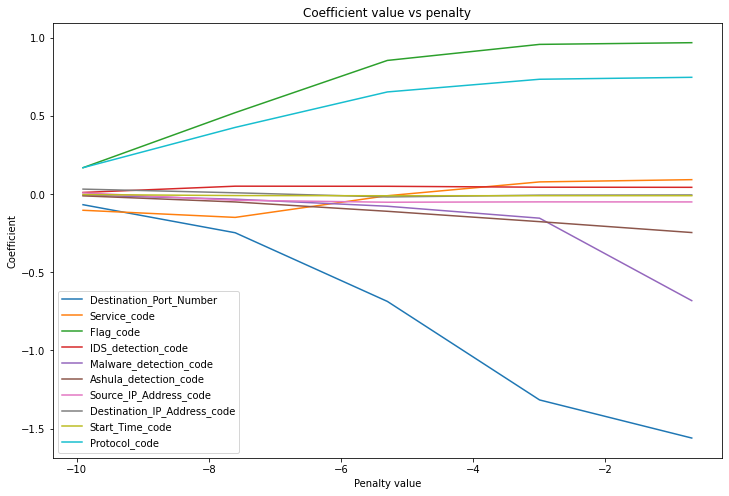

In [10]:
# plot another 10 features for visualisation
temp = coefs.tail(10)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

The relationship between features, as inferred from the coefficients, changes depending on the level of regularisation.

In [11]:
coefs.head(15).T.columns

Index(['Duration', 'Source', 'Destination_bytes', 'Count', 'Same_srv_rate',
       'Serror_rate', 'Srv_serror_rate', 'Dst_host_count',
       'Dst_host_srv_count', 'Dst_host_same_port_rate', 'Dst_host_serror_rate',
       'Dst_host_srv_serror_rate', 'Source_Port_Number',
       'Destination_Port_Number', 'Service_code'],
      dtype='object')

In [12]:
X_train = X_train[coefs.head(15).T.columns]
X_test = X_test[coefs.head(15).T.columns]

In [13]:
X_train.shape, X_test.shape

((99244, 15), (24811, 15))

## Standardize Data




In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

## Classifiers





In [15]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

## Metrics Evaluation




In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Logistic Regression




In [17]:
%%time
clf_LR = linear_model.LogisticRegression(n_jobs=-1, random_state=42, C=1).fit(X_train, y_train)

CPU times: user 72.4 ms, sys: 183 ms, total: 256 ms
Wall time: 1.83 s


In [18]:
pred_y_test = clf_LR.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_test))

f1 = f1_score(y_test, pred_y_test)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_test)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.18024263431542462
F1 Score: 0.1816938241802454
FPR: 0.901494927923118
TPR: 0.9670235546038544


### Naive Bayes





In [19]:
%%time
clf_NB = GaussianNB(var_smoothing=1e-05).fit(X_train, y_train)

CPU times: user 27.6 ms, sys: 3.7 ms, total: 31.3 ms
Wall time: 29.6 ms


In [20]:
pred_y_testNB = clf_NB.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testNB))

f1 = f1_score(y_test, pred_y_testNB)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testNB)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.9058482124863971
F1 Score: 0.0
FPR: 4.4491902473749775e-05
TPR: 0.0


### Random Forest





In [21]:
%%time
clf_RF = RandomForestClassifier(random_state=0,max_depth=70,n_estimators=100).fit(X_train, y_train)

CPU times: user 6.66 s, sys: 60.7 ms, total: 6.72 s
Wall time: 6.73 s


In [22]:
pred_y_testRF = clf_RF.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testRF))

f1 = f1_score(y_test, pred_y_testRF, average='weighted', zero_division=0)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testRF)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.9058885171899561
F1 Score: 0.8611563563923045
FPR: 1.0
TPR: 1.0


### KNN




In [23]:
%%time
clf_KNN = KNeighborsClassifier(algorithm='auto',leaf_size=1,n_neighbors=2,weights='uniform').fit(X_train, y_train)

CPU times: user 6.07 s, sys: 26.1 ms, total: 6.1 s
Wall time: 6.09 s


In [24]:
pred_y_testKNN = clf_KNN.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, pred_y_testKNN))

f1 = f1_score(y_test, pred_y_testKNN)
print('f1:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testKNN)
print('fpr:', fpr[1])
print('tpr:', tpr[1])

accuracy_score: 0.9058885171899561
f1: 0.0
fpr: 1.0
tpr: 1.0


### CatBoost






In [25]:
%%time
clf_CB = CatBoostClassifier(random_state=0,depth=7,iterations=50,learning_rate=0.04).fit(X_train, y_train)

0:	learn: 0.6601401	total: 64.9ms	remaining: 3.18s
1:	learn: 0.6284102	total: 72.5ms	remaining: 1.74s
2:	learn: 0.5989765	total: 80.1ms	remaining: 1.25s
3:	learn: 0.5715893	total: 87.8ms	remaining: 1.01s
4:	learn: 0.5468239	total: 95.5ms	remaining: 860ms
5:	learn: 0.5234629	total: 104ms	remaining: 762ms
6:	learn: 0.5013146	total: 111ms	remaining: 684ms
7:	learn: 0.4819779	total: 119ms	remaining: 623ms
8:	learn: 0.4621396	total: 126ms	remaining: 575ms
9:	learn: 0.4441154	total: 133ms	remaining: 533ms
10:	learn: 0.4273297	total: 141ms	remaining: 501ms
11:	learn: 0.4109815	total: 149ms	remaining: 473ms
12:	learn: 0.3957023	total: 158ms	remaining: 449ms
13:	learn: 0.3813996	total: 166ms	remaining: 426ms
14:	learn: 0.3682043	total: 174ms	remaining: 407ms
15:	learn: 0.3552714	total: 182ms	remaining: 386ms
16:	learn: 0.3424966	total: 190ms	remaining: 370ms
17:	learn: 0.3307101	total: 199ms	remaining: 353ms
18:	learn: 0.3200055	total: 207ms	remaining: 338ms
19:	learn: 0.3091440	total: 214ms	re

In [26]:
pred_y_testCB = clf_CB.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testCB))

f1 = f1_score(y_test, pred_y_testCB, average='weighted', zero_division=0)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testCB)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.9058885171899561
F1 Score: 0.8611563563923045
FPR: 1.0
TPR: 1.0


## Model Evaluation





In [27]:
import pandas as pd, numpy as np
test_df = pd.read_csv("../Kyoto_Test.csv")
test_df.shape

(62028, 24)

In [28]:
# Create feature matrix X and target vextor y
y_eval = test_df['Label_code']
X_eval = test_df.drop(columns=['Label_code'])

In [29]:
X_eval = X_eval[coefs.head(15).T.columns]

In [30]:
X_eval.shape

(62028, 15)

### Model Evaluation - Logistic Regression




In [31]:
modelLR = linear_model.LogisticRegression(n_jobs=-1, random_state=42, C=0.1)
modelLR.fit(X_train, y_train)

LogisticRegression(C=0.1, n_jobs=-1, random_state=42)

In [32]:
# Predict on the new unseen test data
y_evalpredLR = modelLR.predict(X_eval)
y_predLR = modelLR.predict(X_test)

In [33]:
train_scoreLR = modelLR.score(X_train, y_train)
test_scoreLR = modelLR.score(X_test, y_test)
print("Training accuracy is ", train_scoreLR)
print("Testing accuracy is ", test_scoreLR)

Training accuracy is  0.9228064165088066
Testing accuracy is  0.1754866792954738


In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreLR)
print('F1 Score:',f1_score(y_test, y_predLR))
print('Precision Score:',precision_score(y_test, y_predLR))
print('Recall Score:', recall_score(y_test, y_predLR))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predLR))

Performance measures for test:
--------
Accuracy: 0.1754866792954738
F1 Score: 0.18090090090090089
Precision Score: 0.0997791519434629
Recall Score: 0.9674518201284796
Confusion Matrix:
 [[ 2095 20381]
 [   76  2259]]


### Cross validation - Logistic Regression




In [35]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.90482 (+/- 0.00937)
F1 Score: 0.20987 (+/- 0.08477)
Precision: 0.53782 (+/- 0.23297)
Recall: 0.13167 (+/- 0.05835)


### Model Evaluation - Naive Bayes




In [36]:
modelNB = GaussianNB(var_smoothing=1e-09)
modelNB.fit(X_train, y_train)

GaussianNB()

In [37]:
# Predict on the new unseen test data
y_evalpredNB = modelNB.predict(X_eval)
y_predNB = modelNB.predict(X_test)

In [38]:
train_scoreNB = modelNB.score(X_train, y_train)
test_scoreNB = modelNB.score(X_test, y_test)
print("Training accuracy is ", train_scoreNB)
print("Testing accuracy is ", test_scoreNB)

Training accuracy is  0.6140925395993713
Testing accuracy is  0.9058482124863971


In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreNB)
print('F1 Score:',f1_score(y_test, y_predNB))
print('Precision Score:',precision_score(y_test, y_predNB))
print('Recall Score:', recall_score(y_test, y_predNB))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predNB))

Performance measures for test:
--------
Accuracy: 0.9058482124863971
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix:
 [[22475     1]
 [ 2335     0]]


### Cross validation - Naive Bayes




In [40]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.51551 (+/- 0.28768)
F1 Score: 0.27729 (+/- 0.10913)
Precision: 0.18659 (+/- 0.21622)
Recall: 0.89495 (+/- 0.34679)


### Model Evaluation - Random Forest





In [41]:
modelRF = RandomForestClassifier(random_state=0,max_depth=70,n_estimators=100)
modelRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, random_state=0)

In [42]:
# Predict on the new unseen test data
y_evalpredRF = modelRF.predict(X_eval)
y_predRF = modelRF.predict(X_test)

In [43]:
train_scoreRF = modelRF.score(X_train, y_train)
test_scoreRF = modelRF.score(X_test, y_test)
print("Training accuracy is ", train_scoreRF)
print("Testing accuracy is ", test_scoreRF)

Training accuracy is  0.9997480956027568
Testing accuracy is  0.9058885171899561


In [44]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreRF)
print('F1 Score:', f1_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Precision Score:', precision_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Recall Score:', recall_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predRF))

Performance measures for test:
--------
Accuracy: 0.9058885171899561
F1 Score: 0.8611563563923045
Precision Score: 0.8206340055766175
Recall Score: 0.9058885171899561
Confusion Matrix:
 [[22476     0]
 [ 2335     0]]


### Cross validation - Random Forest





In [45]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.99121 (+/- 0.00138)
F1 Score: 0.95346 (+/- 0.00770)
Precision: 0.97478 (+/- 0.01244)
Recall: 0.93316 (+/- 0.02013)


### Model Evaluation - KNN


In [46]:
modelKNN = KNeighborsClassifier(algorithm='auto',leaf_size=1,n_neighbors=2,weights='uniform')
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=2)

In [47]:
# Predict on the new unseen test data
y_evalpredKNN = modelKNN.predict(X_eval)
y_predKNN = modelKNN.predict(X_test)

In [48]:
train_scoreKNN = modelKNN.score(X_train, y_train)
test_scoreKNN = modelKNN.score(X_test, y_test)
print("Training accuracy is ", train_scoreKNN)
print("Testing accuracy is ", test_scoreKNN)

Training accuracy is  0.981298617548668
Testing accuracy is  0.9058885171899561


In [49]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreKNN)
print('F1 Score:', f1_score(y_test, y_predKNN))
print('Precision Score:', precision_score(y_test, y_predKNN))
print('Recall Score:', recall_score(y_test, y_predKNN))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predKNN))

Performance measures for test:
--------
Accuracy: 0.9058885171899561
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix:
 [[22476     0]
 [ 2335     0]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Cross validation - KNN





In [50]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.94169 (+/- 0.00445)
F1 Score: 0.61655 (+/- 0.03890)
Precision: 0.84284 (+/- 0.03106)
Recall: 0.48638 (+/- 0.04332)


### Model Evaluation - CatBoost




In [51]:
modelCB = CatBoostClassifier(random_state=0,depth=7,iterations=50,learning_rate=0.04)
modelCB.fit(X_train, y_train)

0:	learn: 0.6601401	total: 7.99ms	remaining: 392ms
1:	learn: 0.6284102	total: 15.6ms	remaining: 375ms
2:	learn: 0.5989765	total: 23.1ms	remaining: 361ms
3:	learn: 0.5715893	total: 30.4ms	remaining: 350ms
4:	learn: 0.5468239	total: 38.1ms	remaining: 343ms
5:	learn: 0.5234629	total: 45.5ms	remaining: 333ms
6:	learn: 0.5013146	total: 52.5ms	remaining: 323ms
7:	learn: 0.4819779	total: 59.9ms	remaining: 315ms
8:	learn: 0.4621396	total: 67.3ms	remaining: 307ms
9:	learn: 0.4441154	total: 74.9ms	remaining: 299ms
10:	learn: 0.4273297	total: 82.3ms	remaining: 292ms
11:	learn: 0.4109815	total: 89.8ms	remaining: 284ms
12:	learn: 0.3957023	total: 96.8ms	remaining: 276ms
13:	learn: 0.3813996	total: 104ms	remaining: 267ms
14:	learn: 0.3682043	total: 111ms	remaining: 259ms
15:	learn: 0.3552714	total: 118ms	remaining: 251ms
16:	learn: 0.3424966	total: 126ms	remaining: 245ms
17:	learn: 0.3307101	total: 134ms	remaining: 237ms
18:	learn: 0.3200055	total: 141ms	remaining: 230ms
19:	learn: 0.3091440	total: 

In [52]:
# Predict on the new unseen test data
y_evalpredCB = modelCB.predict(X_eval)
y_predCB = modelCB.predict(X_test)

In [53]:
train_scoreCB = modelCB.score(X_train, y_train)
test_scoreCB = modelCB.score(X_test, y_test)
print("Training accuracy is ", train_scoreCB)
print("Testing accuracy is ", test_scoreCB)

Training accuracy is  0.9754947402361855
Testing accuracy is  0.9058885171899561


In [54]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreCB)
print('F1 Score:',f1_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Precision Score:',precision_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Recall Score:', recall_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predCB))

Performance measures for test:
--------
Accuracy: 0.9058885171899561
F1 Score: 0.8611563563923045
Precision Score: 0.8206340055766175
Recall Score: 0.9058885171899561
Confusion Matrix:
 [[22476     0]
 [ 2335     0]]


### Cross validation - CatBoost





In [55]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='accuracy')
f = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='f1')
precision = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='precision')
recall = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='recall')

0:	learn: 0.6600012	total: 5.85ms	remaining: 287ms
1:	learn: 0.6284350	total: 12.5ms	remaining: 301ms
2:	learn: 0.5990700	total: 18.1ms	remaining: 284ms
3:	learn: 0.5724736	total: 23.6ms	remaining: 271ms
4:	learn: 0.5482236	total: 29.7ms	remaining: 267ms
5:	learn: 0.5248069	total: 35.5ms	remaining: 261ms
6:	learn: 0.5026501	total: 40.9ms	remaining: 252ms
7:	learn: 0.4828342	total: 46.5ms	remaining: 244ms
8:	learn: 0.4638249	total: 52.2ms	remaining: 238ms
9:	learn: 0.4457565	total: 57.9ms	remaining: 232ms
10:	learn: 0.4290413	total: 63.5ms	remaining: 225ms
11:	learn: 0.4125113	total: 68.9ms	remaining: 218ms
12:	learn: 0.3976447	total: 74.6ms	remaining: 212ms
13:	learn: 0.3829095	total: 80.2ms	remaining: 206ms
14:	learn: 0.3696700	total: 85.8ms	remaining: 200ms
15:	learn: 0.3565979	total: 91.7ms	remaining: 195ms
16:	learn: 0.3443143	total: 97.4ms	remaining: 189ms
17:	learn: 0.3331550	total: 104ms	remaining: 184ms
18:	learn: 0.3223716	total: 110ms	remaining: 179ms
19:	learn: 0.3118984	tot

23:	learn: 0.2738228	total: 141ms	remaining: 153ms
24:	learn: 0.2655570	total: 147ms	remaining: 147ms
25:	learn: 0.2574620	total: 152ms	remaining: 140ms
26:	learn: 0.2500949	total: 158ms	remaining: 134ms
27:	learn: 0.2427020	total: 163ms	remaining: 128ms
28:	learn: 0.2359063	total: 169ms	remaining: 122ms
29:	learn: 0.2291277	total: 175ms	remaining: 116ms
30:	learn: 0.2228857	total: 180ms	remaining: 111ms
31:	learn: 0.2171623	total: 186ms	remaining: 105ms
32:	learn: 0.2115775	total: 191ms	remaining: 98.6ms
33:	learn: 0.2059462	total: 197ms	remaining: 92.7ms
34:	learn: 0.2007895	total: 203ms	remaining: 86.9ms
35:	learn: 0.1955880	total: 209ms	remaining: 81.1ms
36:	learn: 0.1909091	total: 214ms	remaining: 75.3ms
37:	learn: 0.1860559	total: 220ms	remaining: 69.5ms
38:	learn: 0.1816396	total: 226ms	remaining: 63.7ms
39:	learn: 0.1771821	total: 232ms	remaining: 57.9ms
40:	learn: 0.1731859	total: 237ms	remaining: 52.1ms
41:	learn: 0.1693463	total: 243ms	remaining: 46.3ms
42:	learn: 0.1658673	

34:	learn: 0.2004705	total: 201ms	remaining: 86ms
35:	learn: 0.1954780	total: 206ms	remaining: 80.3ms
36:	learn: 0.1907184	total: 212ms	remaining: 74.5ms
37:	learn: 0.1858363	total: 218ms	remaining: 68.7ms
38:	learn: 0.1813909	total: 224ms	remaining: 63ms
39:	learn: 0.1770810	total: 229ms	remaining: 57.3ms
40:	learn: 0.1729470	total: 235ms	remaining: 51.6ms
41:	learn: 0.1690512	total: 241ms	remaining: 45.8ms
42:	learn: 0.1653502	total: 246ms	remaining: 40.1ms
43:	learn: 0.1623247	total: 252ms	remaining: 34.3ms
44:	learn: 0.1590844	total: 257ms	remaining: 28.6ms
45:	learn: 0.1557814	total: 263ms	remaining: 22.8ms
46:	learn: 0.1525726	total: 268ms	remaining: 17.1ms
47:	learn: 0.1500701	total: 274ms	remaining: 11.4ms
48:	learn: 0.1472380	total: 280ms	remaining: 5.71ms
49:	learn: 0.1444506	total: 285ms	remaining: 0us
0:	learn: 0.6600688	total: 5.41ms	remaining: 265ms
1:	learn: 0.6285513	total: 11.3ms	remaining: 271ms
2:	learn: 0.5992413	total: 17.1ms	remaining: 267ms
3:	learn: 0.5726693	to

49:	learn: 0.1455591	total: 276ms	remaining: 0us
0:	learn: 0.6600012	total: 5.71ms	remaining: 280ms
1:	learn: 0.6284350	total: 11.2ms	remaining: 269ms
2:	learn: 0.5990700	total: 16.8ms	remaining: 263ms
3:	learn: 0.5724736	total: 22.2ms	remaining: 255ms
4:	learn: 0.5482236	total: 27.9ms	remaining: 252ms
5:	learn: 0.5248069	total: 33.5ms	remaining: 246ms
6:	learn: 0.5026501	total: 39.1ms	remaining: 240ms
7:	learn: 0.4828342	total: 44.6ms	remaining: 234ms
8:	learn: 0.4638249	total: 50.1ms	remaining: 228ms
9:	learn: 0.4457565	total: 55.9ms	remaining: 224ms
10:	learn: 0.4290413	total: 61.3ms	remaining: 217ms
11:	learn: 0.4125113	total: 66.8ms	remaining: 212ms
12:	learn: 0.3976447	total: 72.5ms	remaining: 206ms
13:	learn: 0.3829095	total: 78ms	remaining: 201ms
14:	learn: 0.3696700	total: 83.6ms	remaining: 195ms
15:	learn: 0.3565979	total: 89ms	remaining: 189ms
16:	learn: 0.3443143	total: 94.4ms	remaining: 183ms
17:	learn: 0.3331550	total: 100ms	remaining: 178ms
18:	learn: 0.3223716	total: 10

26:	learn: 0.2500949	total: 154ms	remaining: 131ms
27:	learn: 0.2427020	total: 160ms	remaining: 126ms
28:	learn: 0.2359063	total: 166ms	remaining: 120ms
29:	learn: 0.2291277	total: 172ms	remaining: 114ms
30:	learn: 0.2228857	total: 177ms	remaining: 109ms
31:	learn: 0.2171623	total: 183ms	remaining: 103ms
32:	learn: 0.2115775	total: 189ms	remaining: 97.3ms
33:	learn: 0.2059462	total: 195ms	remaining: 91.6ms
34:	learn: 0.2007895	total: 200ms	remaining: 85.8ms
35:	learn: 0.1955880	total: 206ms	remaining: 80.1ms
36:	learn: 0.1909091	total: 212ms	remaining: 74.4ms
37:	learn: 0.1860559	total: 217ms	remaining: 68.6ms
38:	learn: 0.1816396	total: 223ms	remaining: 62.9ms
39:	learn: 0.1771821	total: 229ms	remaining: 57.2ms
40:	learn: 0.1731859	total: 235ms	remaining: 51.5ms
41:	learn: 0.1693463	total: 240ms	remaining: 45.8ms
42:	learn: 0.1658673	total: 246ms	remaining: 40.1ms
43:	learn: 0.1628201	total: 252ms	remaining: 34.3ms
44:	learn: 0.1595885	total: 257ms	remaining: 28.6ms
45:	learn: 0.15629

38:	learn: 0.1813909	total: 221ms	remaining: 62.2ms
39:	learn: 0.1770810	total: 227ms	remaining: 56.7ms
40:	learn: 0.1729470	total: 232ms	remaining: 51ms
41:	learn: 0.1690512	total: 238ms	remaining: 45.3ms
42:	learn: 0.1653502	total: 244ms	remaining: 39.7ms
43:	learn: 0.1623247	total: 249ms	remaining: 34ms
44:	learn: 0.1590844	total: 255ms	remaining: 28.3ms
45:	learn: 0.1557814	total: 261ms	remaining: 22.7ms
46:	learn: 0.1525726	total: 266ms	remaining: 17ms
47:	learn: 0.1500701	total: 272ms	remaining: 11.3ms
48:	learn: 0.1472380	total: 277ms	remaining: 5.65ms
49:	learn: 0.1444506	total: 282ms	remaining: 0us
0:	learn: 0.6600688	total: 6.3ms	remaining: 309ms
1:	learn: 0.6285513	total: 12.4ms	remaining: 298ms
2:	learn: 0.5992413	total: 18.1ms	remaining: 284ms
3:	learn: 0.5726693	total: 23.7ms	remaining: 272ms
4:	learn: 0.5484623	total: 29.2ms	remaining: 263ms
5:	learn: 0.5249277	total: 35ms	remaining: 257ms
6:	learn: 0.5030686	total: 40.4ms	remaining: 248ms
7:	learn: 0.4822311	total: 46ms

9:	learn: 0.4457565	total: 57.3ms	remaining: 229ms
10:	learn: 0.4290413	total: 63.5ms	remaining: 225ms
11:	learn: 0.4125113	total: 69.4ms	remaining: 220ms
12:	learn: 0.3976447	total: 75.2ms	remaining: 214ms
13:	learn: 0.3829095	total: 81.4ms	remaining: 209ms
14:	learn: 0.3696700	total: 87.3ms	remaining: 204ms
15:	learn: 0.3565979	total: 92.6ms	remaining: 197ms
16:	learn: 0.3443143	total: 98.2ms	remaining: 191ms
17:	learn: 0.3331550	total: 104ms	remaining: 184ms
18:	learn: 0.3223716	total: 109ms	remaining: 178ms
19:	learn: 0.3118984	total: 115ms	remaining: 173ms
20:	learn: 0.3019566	total: 122ms	remaining: 168ms
21:	learn: 0.2919222	total: 127ms	remaining: 162ms
22:	learn: 0.2831401	total: 133ms	remaining: 156ms
23:	learn: 0.2743013	total: 138ms	remaining: 150ms
24:	learn: 0.2657805	total: 144ms	remaining: 144ms
25:	learn: 0.2579674	total: 149ms	remaining: 138ms
26:	learn: 0.2504166	total: 155ms	remaining: 132ms
27:	learn: 0.2428806	total: 160ms	remaining: 126ms
28:	learn: 0.2360689	tot

25:	learn: 0.2574620	total: 147ms	remaining: 136ms
26:	learn: 0.2500949	total: 153ms	remaining: 130ms
27:	learn: 0.2427020	total: 159ms	remaining: 125ms
28:	learn: 0.2359063	total: 165ms	remaining: 119ms
29:	learn: 0.2291277	total: 171ms	remaining: 114ms
30:	learn: 0.2228857	total: 177ms	remaining: 108ms
31:	learn: 0.2171623	total: 183ms	remaining: 103ms
32:	learn: 0.2115775	total: 188ms	remaining: 97ms
33:	learn: 0.2059462	total: 194ms	remaining: 91.2ms
34:	learn: 0.2007895	total: 199ms	remaining: 85.5ms
35:	learn: 0.1955880	total: 205ms	remaining: 79.7ms
36:	learn: 0.1909091	total: 211ms	remaining: 74.1ms
37:	learn: 0.1860559	total: 216ms	remaining: 68.4ms
38:	learn: 0.1816396	total: 222ms	remaining: 62.7ms
39:	learn: 0.1771821	total: 228ms	remaining: 57ms
40:	learn: 0.1731859	total: 234ms	remaining: 51.3ms
41:	learn: 0.1693463	total: 239ms	remaining: 45.6ms
42:	learn: 0.1658673	total: 246ms	remaining: 40ms
43:	learn: 0.1628201	total: 251ms	remaining: 34.3ms
44:	learn: 0.1595885	tota

35:	learn: 0.1954780	total: 201ms	remaining: 78.2ms
36:	learn: 0.1907184	total: 207ms	remaining: 72.9ms
37:	learn: 0.1858363	total: 213ms	remaining: 67.4ms
38:	learn: 0.1813909	total: 220ms	remaining: 61.9ms
39:	learn: 0.1770810	total: 226ms	remaining: 56.5ms
40:	learn: 0.1729470	total: 232ms	remaining: 50.8ms
41:	learn: 0.1690512	total: 237ms	remaining: 45.2ms
42:	learn: 0.1653502	total: 243ms	remaining: 39.6ms
43:	learn: 0.1623247	total: 249ms	remaining: 34ms
44:	learn: 0.1590844	total: 255ms	remaining: 28.4ms
45:	learn: 0.1557814	total: 261ms	remaining: 22.7ms
46:	learn: 0.1525726	total: 267ms	remaining: 17ms
47:	learn: 0.1500701	total: 272ms	remaining: 11.3ms
48:	learn: 0.1472380	total: 279ms	remaining: 5.69ms
49:	learn: 0.1444506	total: 285ms	remaining: 0us
0:	learn: 0.6600688	total: 6.17ms	remaining: 302ms
1:	learn: 0.6285513	total: 12.6ms	remaining: 303ms
2:	learn: 0.5992413	total: 18.9ms	remaining: 297ms
3:	learn: 0.5726693	total: 25.6ms	remaining: 294ms
4:	learn: 0.5484623	tot

0:	learn: 0.6600012	total: 5.83ms	remaining: 286ms
1:	learn: 0.6284350	total: 11.8ms	remaining: 284ms
2:	learn: 0.5990700	total: 17.6ms	remaining: 276ms
3:	learn: 0.5724736	total: 23.6ms	remaining: 271ms
4:	learn: 0.5482236	total: 29.2ms	remaining: 263ms
5:	learn: 0.5248069	total: 34.7ms	remaining: 254ms
6:	learn: 0.5026501	total: 40.1ms	remaining: 246ms
7:	learn: 0.4828342	total: 46ms	remaining: 241ms
8:	learn: 0.4638249	total: 51.6ms	remaining: 235ms
9:	learn: 0.4457565	total: 57ms	remaining: 228ms
10:	learn: 0.4290413	total: 62.6ms	remaining: 222ms
11:	learn: 0.4125113	total: 68.3ms	remaining: 216ms
12:	learn: 0.3976447	total: 74.1ms	remaining: 211ms
13:	learn: 0.3829095	total: 79.9ms	remaining: 205ms
14:	learn: 0.3696700	total: 85.8ms	remaining: 200ms
15:	learn: 0.3565979	total: 91.2ms	remaining: 194ms
16:	learn: 0.3443143	total: 96.8ms	remaining: 188ms
17:	learn: 0.3331550	total: 102ms	remaining: 182ms
18:	learn: 0.3223716	total: 108ms	remaining: 176ms
19:	learn: 0.3118984	total: 

13:	learn: 0.3835866	total: 82.7ms	remaining: 213ms
14:	learn: 0.3703814	total: 88.7ms	remaining: 207ms
15:	learn: 0.3572989	total: 94.5ms	remaining: 201ms
16:	learn: 0.3449203	total: 101ms	remaining: 195ms
17:	learn: 0.3329616	total: 106ms	remaining: 189ms
18:	learn: 0.3221793	total: 112ms	remaining: 183ms
19:	learn: 0.3115914	total: 118ms	remaining: 176ms
20:	learn: 0.3013851	total: 123ms	remaining: 170ms
21:	learn: 0.2914698	total: 128ms	remaining: 163ms
22:	learn: 0.2825650	total: 134ms	remaining: 158ms
23:	learn: 0.2738228	total: 140ms	remaining: 152ms
24:	learn: 0.2655570	total: 146ms	remaining: 146ms
25:	learn: 0.2574620	total: 151ms	remaining: 140ms
26:	learn: 0.2500949	total: 157ms	remaining: 134ms
27:	learn: 0.2427020	total: 162ms	remaining: 128ms
28:	learn: 0.2359063	total: 168ms	remaining: 122ms
29:	learn: 0.2291277	total: 173ms	remaining: 116ms
30:	learn: 0.2228857	total: 179ms	remaining: 110ms
31:	learn: 0.2171623	total: 184ms	remaining: 104ms
32:	learn: 0.2115775	total: 

37:	learn: 0.1858363	total: 227ms	remaining: 71.8ms
38:	learn: 0.1813909	total: 233ms	remaining: 65.8ms
39:	learn: 0.1770810	total: 239ms	remaining: 59.8ms
40:	learn: 0.1729470	total: 245ms	remaining: 53.8ms
41:	learn: 0.1690512	total: 251ms	remaining: 47.8ms
42:	learn: 0.1653502	total: 257ms	remaining: 41.8ms
43:	learn: 0.1623247	total: 262ms	remaining: 35.8ms
44:	learn: 0.1590844	total: 268ms	remaining: 29.8ms
45:	learn: 0.1557814	total: 273ms	remaining: 23.8ms
46:	learn: 0.1525726	total: 279ms	remaining: 17.8ms
47:	learn: 0.1500701	total: 285ms	remaining: 11.9ms
48:	learn: 0.1472380	total: 290ms	remaining: 5.93ms
49:	learn: 0.1444506	total: 297ms	remaining: 0us
0:	learn: 0.6600688	total: 5.82ms	remaining: 285ms
1:	learn: 0.6285513	total: 11.6ms	remaining: 279ms
2:	learn: 0.5992413	total: 17.2ms	remaining: 269ms
3:	learn: 0.5726693	total: 22.7ms	remaining: 261ms
4:	learn: 0.5484623	total: 28.2ms	remaining: 254ms
5:	learn: 0.5249277	total: 33.6ms	remaining: 246ms
6:	learn: 0.5030686	t

In [56]:
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.97577 (+/- 0.00220)
F1 Score: 0.86283 (+/- 0.01483)
Precision: 0.95037 (+/- 0.01775)
Recall: 0.79030 (+/- 0.03036)
